In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/K2CO3-all.csv')
df

,metal_initial_conc,metal_mmol,K2CO3_initial_conc,K2CO3_mmol,K2CO3_vol,ph,rate,total_vol,metal_total_conc,K2CO3_total_conc,...,ionic_total,precipitation_order,OH_total,Q_Fe(OH)3,logQ_Fe(OH)3,Q_Co(OH)2,FeCl3,destination,XRD,singlephase
0,3.00,0.9,0.15,1.3500,9.00,11.738561,1,9.30,0.100000,0.150000,...,0.952650,1,0.005301,9.928170e-09,-8.003131,4.682620e-07,1,0227-17,"Spinel,ZnO",False
1,0.30,0.9,0.15,1.3500,9.00,11.738561,1,12.00,0.080000,0.110000,...,0.732054,1,0.004108,3.697130e-09,-8.432136,2.250000e-07,1,0227-19,"Spinel,ZnO",False
2,3.00,1.5,0.15,1.3500,9.00,11.738561,6,9.50,0.160000,0.140000,...,1.222594,1,0.005189,1.490280e-08,-7.826733,7.180060e-07,1,0227-21,"Spinel,?",False
3,0.30,0.9,0.15,1.3500,9.00,11.738561,6,12.00,0.080000,0.110000,...,0.732054,1,0.004108,3.697130e-09,-8.432136,2.250000e-07,1,0227-23,"Spinel,ZnO",False
4,3.00,1.5,0.45,1.3500,3.00,11.977121,1,3.50,0.430000,0.390000,...,3.324066,1,0.008132,1.541350e-07,-6.812099,4.738780e-06,1,0227-25,"Spinel,Fe2O3",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.17,1.0,0.41,1.5006,3.66,11.956907,6,9.54,0.104822,0.157233,...,0.997544,0,0.003474,2.930080e-09,-8.533121,2.108530e-07,0,0509-#21,NaN,True
66,1.00,0.5,0.15,0.7500,5.00,11.738561,1,5.50,0.090000,0.140000,...,0.872490,1,0.004979,7.407220e-09,-8.130345,3.719010e-07,0,0514-#21,NaN,True
67,1.00,0.5,0.15,0.7500,5.00,11.738561,6,5.50,0.090000,0.140000,...,0.872490,1,0.004979,7.407220e-09,-8.130345,3.719010e-07,0,0514-#22,NaN,False
68,1.00,0.5,0.45,0.7515,1.67,11.977121,1,2.17,0.230000,0.350000,...,2.203650,1,0.007301,5.967200e-08,-7.224229,2.043300e-06,0,0514-#23,NaN,False


In [3]:
def read_and_preprocess_data(file_path, random_state=0):
    # Load data from CSV file
    df = pd.read_csv(file_path)

    # Shuffle the data
    np.random.seed(random_state)
    random_indices = np.random.permutation(df.index)
    df = df.reindex(random_indices).reset_index(drop=True)

    # Preprocessing the 'precipitation_order' column
    if 'precipitation_order' in df.columns:
        df['precipitation_order'] = df['precipitation_order'].replace({'reverse': 1.0, 'normal': 0.0})

    # List of columns to drop if they exist
    columns_to_drop = ['XRD', 'destination', 'total_vol', 'FeCl3']
    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

    # Preprocessing the target column (y_label)
    y_label = 'singlephase'
    if y_label in df.columns:
        df[y_label] = df[y_label].replace({'TRUE': True, 'FALSE': False, 'no': None})

        # Drop rows with None in the target column
        df = df.dropna(subset=[y_label]).reset_index(drop=True)

        # Convert target column to float
        df[y_label] = df[y_label].astype(np.float32)

    # Split data into features (X) and target (y)
    y = df[y_label]
    X = df.drop(columns=[y_label], errors='ignore')

    return X, y, df

X, y, df = read_and_preprocess_data('../data/K2CO3-all.csv')
df

,metal_initial_conc,metal_mmol,K2CO3_initial_conc,K2CO3_mmol,K2CO3_vol,ph,rate,metal_total_conc,K2CO3_total_conc,ionic_Fe3+,...,ionic_OH-,ionic_CO32-,ionic_metal,ionic_total,precipitation_order,OH_total,Q_Fe(OH)3,logQ_Fe(OH)3,Q_Co(OH)2,singlephase
0,0.200000,1.200000,0.450000,1.800000,4.00,11.977121,6,0.120000,0.180000,0.360000,...,0.001897,0.360000,0.440000,1.141897,0,0.003795,4.371530e-09,-8.359366,2.880000e-07,0.0
1,1.100000,1.800000,0.330000,2.692800,8.16,11.909772,2,0.180000,0.280000,0.540000,...,0.003379,0.560000,0.660000,1.743379,0,0.006758,3.703060e-08,-7.431439,1.369960e-06,0.0
2,1.666667,1.000000,0.450000,1.498500,3.33,11.977121,6,0.254453,0.381298,0.763359,...,0.004019,0.762595,0.932994,2.420177,1,0.008038,8.811200e-08,-7.054965,2.740330e-06,0.0
3,2.500000,1.000000,0.280000,1.800400,6.43,11.874094,2,0.150000,0.260000,0.450000,...,0.003523,0.520000,0.550000,1.533523,1,0.007045,3.496660e-08,-7.456347,1.240820e-06,0.0
4,0.600000,1.800000,0.430000,2.674600,6.22,11.967249,2,0.200000,0.290000,0.600000,...,0.003131,0.580000,0.733333,1.873131,0,0.006263,3.275510e-08,-7.484721,1.307490e-06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,1.670000,1.500000,0.450000,2.700000,6.00,11.977121,6,0.220000,0.390000,0.660000,...,0.004125,0.780000,0.806667,2.274125,1,0.008249,8.233830e-08,-7.084398,2.495270e-06,0.0
66,1.000000,0.500000,0.150000,0.750000,5.00,11.738561,6,0.090000,0.140000,0.270000,...,0.002490,0.280000,0.330000,0.872490,1,0.004979,7.407220e-09,-8.130345,3.719010e-07,1.0
67,1.040000,1.000000,0.300000,1.500000,5.00,11.889076,6,0.167785,0.251678,0.503356,...,0.003249,0.503356,0.615213,1.597209,0,0.006498,3.069450e-08,-7.512939,1.180870e-06,0.0
68,1.914894,0.995745,0.353866,1.500393,4.24,11.924935,1,0.209190,0.315209,0.627570,...,0.003747,0.630417,0.767030,1.995323,1,0.007494,5.868540e-08,-7.231470,1.957840e-06,0.0


In [4]:
# # df = pd.read_csv('K2CO3-all.csv', usecols=['rate', 'FeCl3', 'precipitation_order',
# #                                            'singlephase', 'ionic_total','ionic_metal',
# #                                           'Q_Fe(OH)3', 'metal_total_conc', 'K2CO3_total_conc', 'ph'])

# df = pd.read_csv('../data/K2CO3-all.csv')

# random_indices = np.random.permutation(df.index)
# df = df.reindex(random_indices).reset_index(drop=True)


# #%% preprocessing df
# # replace the value 'reverse' in the column "precipitation_order" as 1
# df['precipitation_order'] = df['precipitation_order'].replace('reverse', 1.0)
# # replace the value 'normal' in the column "precipitation_order" as 0 for X
# df['precipitation_order'] = df['precipitation_order'].replace('normal', 0.0)

# df = df.drop(columns=['XRD', 'destination', 'total_vol'])

# # df = df.drop(columns=['temperature', 'precipitation_order', 'K2CO3_conc', 'total volume'])

# y_label = 'singlephase'
# #%% preprocessing y
# # replace "True" as True, "False" as False, and "no" as None
# # single phase is positve, multiphase is negative
# df[y_label] = df[y_label].replace('TRUE', True)
# df[y_label] = df[y_label].replace('FALSE', False)
# df[y_label] = df[y_label].replace('no', None)
# # No means xrd can’t be measured due to sample size
# # drop rows with None in the column y_label
# df = df.dropna(subset=[y_label]).reset_index(drop=True)
# # set df[y_label] to boolean
# df[y_label] = df[y_label].astype(np.float32)

# ## Applying log
# # df['logQ_Co(OH)2'] = df['Q_Co(OH)2'].apply(lambda x: np.log(x))
# # df['logOH_total'] = df['OH_total'].apply(lambda x: np.log(x))

# # df = df.drop(columns=['Q_Co(OH)2','OH_total'])

# y = df[y_label]

# X = df.drop(columns=[y_label, 'FeCl3'])

# df

In [5]:
X.columns

Index(['metal_initial_conc', 'metal_mmol', 'K2CO3_initial_conc', 'K2CO3_mmol',
       'K2CO3_vol', 'ph', 'rate', 'metal_total_conc', 'K2CO3_total_conc',
       'ionic_Fe3+', 'ionic_Cl-', 'ionic_Co2+', 'ionic_Zn2+', 'ionic_NO3-',
       'ionic_Na+', 'ionic_K+', 'ionic_OH-', 'ionic_CO32-', 'ionic_metal',
       'ionic_total', 'precipitation_order', 'OH_total', 'Q_Fe(OH)3',
       'logQ_Fe(OH)3', 'Q_Co(OH)2'],
      dtype='object')

In [6]:
len(X.columns)

25

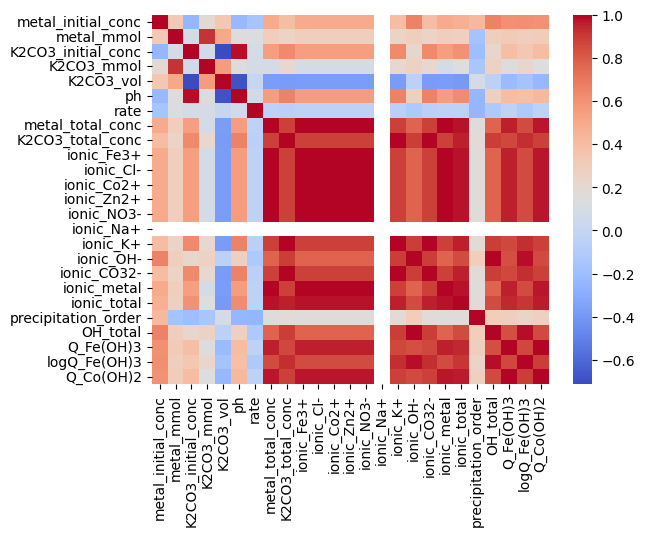

In [7]:
correlation_matrix  = X.corr(numeric_only=True)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.show()

In [8]:
def drop_highly_correlated_columns(df, y_label, excluded_col='ionic_Na+', threshold=0.55):
    """
    Drops columns from the dataframe that are highly correlated above a given threshold.
    
    Parameters:
    - df: DataFrame containing the data.
    - y_label: The target label column to exclude from the correlation calculation.
    - excluded_col: Column to exclude from the correlation calculation (default: 'ionic_Na+').
    - threshold: Correlation threshold above which columns will be dropped (default: 0.55).
    
    Returns:
    - DataFrame with highly correlated columns dropped.
    """
    
    # Drop the target label and excluded column from the features
    X = df.drop(columns=[y_label, excluded_col])

    # Compute the absolute correlation matrix
    corr_matrix = X.corr().abs()

    # Identify columns to drop based on the correlation threshold
    columns_to_drop = set()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold:
                colname = corr_matrix.columns[i]
                columns_to_drop.add(colname)

    # Drop the identified columns
    X = X.drop(columns=columns_to_drop)

    return X

X = drop_highly_correlated_columns(df, y_label='singlephase', threshold=0.55)

<AxesSubplot: >

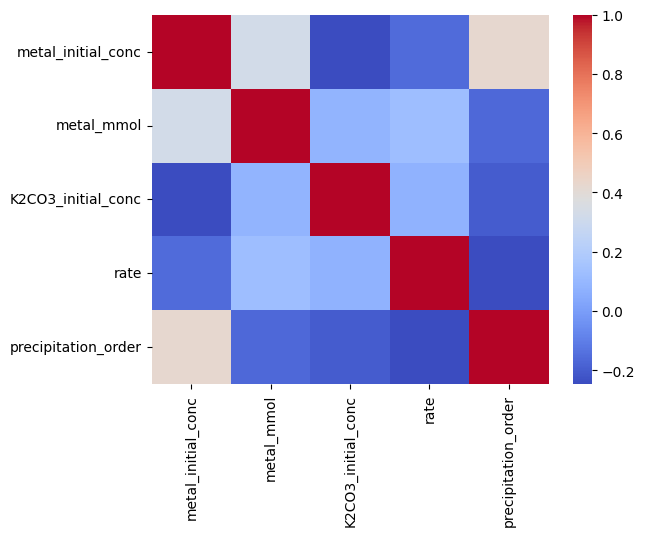

In [9]:
# New coorelation matrix

reduced_correlation_matrix  = X.corr(numeric_only=True)
sns.heatmap(reduced_correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")

(array([79.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 22.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

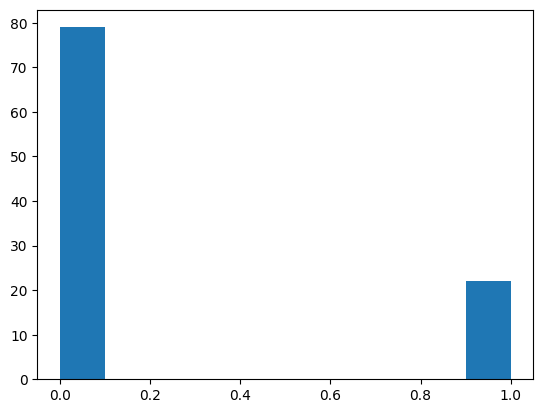

In [13]:
plt.hist(y)

## New data

In [11]:
new_df = pd.read_csv('../data/K2CO3-11212024.csv').dropna().drop('sample', axis=1)

new_df['singlephase'] = new_df['singlephase'].replace({'TRUE': True, 'FALSE': False, 'no': None})
new_df['singlephase'] = new_df['singlephase'].astype(np.float32)
new_df

,metal_initial_conc,metal_mmol,K2CO3_initial_conc,rate,precipitation_order,singlephase
0,0.4,0.3,0.16,2,0,0.0
1,0.4,0.8,0.16,4,0,0.0
2,1.2,0.3,0.16,2,0,0.0
3,1.2,0.8,0.16,4,0,0.0
4,0.4,0.3,0.20,2,0,0.0
5,0.4,0.8,0.20,4,0,0.0
6,1.2,0.3,0.20,2,0,0.0
7,1.2,0.8,0.20,4,0,0.0
8,0.4,0.3,0.24,2,0,0.0
9,0.4,0.8,0.24,4,0,0.0


In [12]:
X = pd.concat([X, new_df[['metal_initial_conc','metal_mmol', 'K2CO3_initial_conc', 'rate', 'precipitation_order']]], ignore_index=True)
y = pd.concat([y, new_df['singlephase']], ignore_index=True)

## Using kernel learning

In [14]:
def kernel_numeric(x1, x2, kernel_type='RBF', gamma=1.0):
    """
    Compute kernel between two vectors.
    
    Parameters:
    - x1, x2: Input vectors.
    - kernel_type: Type of the kernel to use ('RBF', 'Manhattan', 'Euclidean').
    - gamma: Gamma parameter for the RBF kernel, where gamma = 1 / (2 * sigma^2).
    
    Returns:
    - The kernel value based on the selected kernel type.
    """
    if kernel_type == 'Euclidean':
        return np.sqrt(np.sum((x1 - x2) ** 2))
    elif kernel_type == 'Manhattan':
        return np.sum(np.abs(x1 - x2))
    elif kernel_type == 'RBF':
        distance_squared = np.sum((x1 - x2) ** 2)
        return np.exp(-gamma * distance_squared)

def compute_distances(X1, X2, kernel_type='Euclidean', gamma=0.1):
    """
    Compute distances or kernel values between two sets of vectors.

    Parameters:
    - X1, X2: Input datasets. Each should be a NumPy array of shape (n_samples, n_features).
    - kernel_type: Type of the metric or kernel to compute ('RBF', 'Manhattan', 'Euclidean').
    - gamma: Gamma parameter for the RBF kernel, where gamma = 1 / (2 * sigma^2).

    Returns:
    - A matrix of distances or kernel values.
    """
    # Calculate the pairwise difference matrix
    diff = X1[:, np.newaxis, :] - X2[np.newaxis, :, :]


    if kernel_type == 'Euclidean':
        # Compute Euclidean distance
        distances = np.sqrt(np.sum(diff**2, axis=2, keepdims=False))
    elif kernel_type == 'Manhattan':
        # Compute Manhattan distance
        distances = np.sum(np.abs(diff), axis=2, keepdims=False)
    elif kernel_type == 'RBF':
        # Compute RBF kernel
        distance_squared = np.sum(diff**2, axis=2, keepdims=False)
        distances = np.exp(-gamma * distance_squared)
    else:
        raise ValueError("Unsupported kernel type")

    return distances


In [15]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from tqdm import tqdm

# # Define the classifier
# clf = SVC(kernel='rbf', probability=True, random_state=42, class_weight='balanced')

# # Initialize LeaveOneOut
# loo = LeaveOneOut()

# # Arrays to store the predictions and uncertainties for each sample
# predictions = np.zeros(len(y))
# uncertainties = np.zeros(len(y))

# # Perform LOOCV
# for train_index, test_index in tqdm(loo.split(X), total=loo.get_n_splits(X), desc="Processing LeaveOneOut"):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     # Standardize each feature
#     scaler = MinMaxScaler()
#     X_train_S = scaler.fit_transform(X_train)
#     X_test_S = scaler.transform(X_test)
#     X_train_sfs = compute_distances(X_train_S, X_train_S, kernel_type='Euclidean')
#     X_test_sfs = compute_distances(X_test_S, X_train_S, kernel_type='Euclidean')

#     # Fit the model
#     clf.fit(X_train_sfs, y_train)
    
#     # Make predictions and store them
#     decision_function = clf.decision_function(X_test_sfs)
# #     print(clf.predict_proba(X_test_sfs))
# #     print(decision_function)
#     predictions[test_index] = clf.predict(X_test_sfs)
#     uncertainties[test_index] = np.abs(decision_function)
# #     break

# # Un certainty is defined based on distance from decision boundary.
# # Normalizing uncertainties to range [0, 1] for better interpretation
# uncertainties = 1 - uncertainties / np.max(uncertainties)

# print(f'LOOCV estimate predictions: {predictions}')
# print(f'Uncertainty estimates: {uncertainties}')

def train_and_predict_with_loocv(X, y, kernel_type='Euclidean', gamma=0.1, random_state=42):
    """
    Train a model using LOOCV, make predictions, and compute uncertainties.

    Parameters:
    - X: Features dataframe (input data).
    - y: Target values.
    - kernel_type: The kernel type to use for distance computation ('Euclidean', 'Manhattan', 'RBF').
    - gamma: Gamma parameter for the RBF kernel (default: 0.1).
    - random_state: Random seed for reproducibility (default: 42).

    Returns:
    - predictions: Array of predicted labels for each sample.
    - uncertainties: Array of uncertainty estimates for each prediction.
    """
    
    # Define the classifier
    clf = SVC(kernel='rbf', probability=True, random_state=random_state, class_weight='balanced')

    # Initialize LeaveOneOut
    loo = LeaveOneOut()

    # Arrays to store the predictions and uncertainties for each sample
    predictions = np.zeros(len(y))
    uncertainties = np.zeros(len(y))

    # Perform LOOCV
    for train_index, test_index in tqdm(loo.split(X), total=loo.get_n_splits(X), desc="Processing LeaveOneOut"):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Standardize each feature
        scaler = MinMaxScaler()
        X_train_S = scaler.fit_transform(X_train)
        X_test_S = scaler.transform(X_test)
        
        # Compute kernel or distances
        X_train_sfs = compute_distances(X_train_S, X_train_S, kernel_type=kernel_type, gamma=gamma)
        X_test_sfs = compute_distances(X_test_S, X_train_S, kernel_type=kernel_type, gamma=gamma)

        # Fit the model
        clf.fit(X_train_sfs, y_train)
        
        # Make predictions and store them
        decision_function = clf.decision_function(X_test_sfs)
        predictions[test_index] = clf.predict(X_test_sfs)
        uncertainties[test_index] = np.abs(decision_function)

    # Normalize uncertainties to range [0, 1] for better interpretation
    uncertainties = 1 - uncertainties / np.max(uncertainties)

    return predictions, uncertainties

predictions, uncertainties = train_and_predict_with_loocv(X, y, kernel_type='Euclidean', gamma=0.1)
print(f'Predictions: {predictions}')
print(f'Uncertainty estimates: {uncertainties}')


Processing LeaveOneOut: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 101/101 [00:00<00:00, 262.25it/s]

Predictions: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]
Uncertainty estimates: [0.46229343 0.36519101 0.33512649 0.43740403 0.71644212 0.739448
 0.51049597 0.64052782 0.26806337 0.63375453 0.34013416 0.96025086
 0.35900459 0.34013416 0.35231655 0.61611866 0.64052782 0.35231655
 0.67742114 0.44788062 0.34013416 0.49156169 0.4299293  0.20220536
 0.35244158 0.86733576 0.62250028 0.73438706 0.33197842 0.23543481
 0.43773181 0.35231655 0.86889954 0.47696943 0.64817519 0.64792456
 0.07097564 0.86720064 0.35220269 0.62250028 0.08684236 0.86237595
 0.66691744 0.49816845 0.39794118 0.4707594  0.86889954 0.86889954
 0.56752899 0.50803331 0.79702041 0.27241424 0.63375453 0.24935584
 0.35246839 0.85756717 0.16388876 0.73712704 0.6479245

In [16]:
# compute_distances(X_train_S, X_train_S,  kernel_type=kernel_type)

LOOCV estimate accuracy: 0.733
LOOCV estimate balanced accuracy: 0.747
LOOCV estimate AUC: 0.747


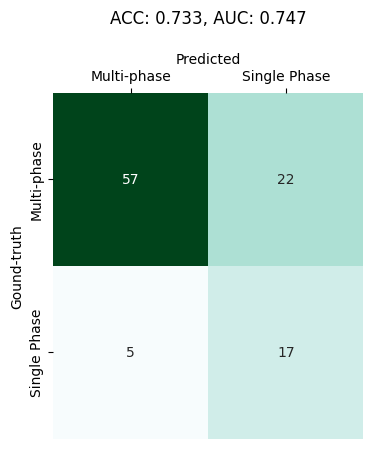

In [17]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score



# Calculate accuracy
accuracy = accuracy_score(y, predictions)
print(f'LOOCV estimate accuracy: {accuracy:.3f}')

# calculation balanced accuracy
balanced_accuracy = balanced_accuracy_score(y, predictions)
print(f'LOOCV estimate balanced accuracy: {balanced_accuracy:.3f}')

# Calculate AUC
auc = roc_auc_score(y, predictions)
print(f'LOOCV estimate AUC: {auc:.3f}')

#%% confusion matrix
from sklearn.metrics import confusion_matrix
confuse_matrix = confusion_matrix(y, predictions)

# Convert to DataFrame and replace 0 and 1
confuse_matrix_df = pd.DataFrame(confuse_matrix, 
                                 columns=['Multi-phase', 'Single Phase'], 
                                 index=['Multi-phase', 'Single Phase'])



# plot confuse matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confuse_matrix_df, annot=True, cbar=False, cmap='BuGn')
plt.xlabel('Predicted')
plt.ylabel('Gound-truth')
# show x label and x ticks on the top
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
# set fig size
plt.gcf().set_size_inches(4, 4.5)

# add metrics to the title
plt.title(f'ACC: {accuracy:.3f}, AUC: {auc:.3f}\n',fontsize=12)
plt.savefig('confusion_matrix.png', dpi=400,  bbox_inches='tight')

#%%
# train on the whole dataset
# clf.fit(X, y)

#%%
# get feature importance
# feature_importance = clf.feature_importances_
# feature_importance_df = pd.DataFrame(feature_importance, index=X.columns, columns=['Feature importance'])
# feature_importance_df = feature_importance_df.sort_values(by='Feature importance', ascending=False)
# # plot feature importance
# feature_importance_df.plot(kind='barh', figsize=(6, 8))

In [19]:
X.head(100)

,metal_initial_conc,metal_mmol,K2CO3_initial_conc,rate,precipitation_order
0,0.200000,1.2,0.45,6,0
1,1.100000,1.8,0.33,2,0
2,1.666667,1.0,0.45,6,1
3,2.500000,1.0,0.28,2,1
4,0.600000,1.8,0.43,2,0
...,...,...,...,...,...
95,0.400000,0.8,0.24,4,1
96,1.200000,0.8,0.24,4,1
97,0.400000,0.3,0.28,2,1
98,0.400000,0.8,0.28,4,1


## Defining the grid

In [32]:
import random
from itertools import product

param_grid = {
    'metal_initial_conc': np.arange(0.2, 3.2, 0.2),
    'metal_mmol': np.arange(0.2, 2.2, 0.2),
    'K2CO3_initial_conc': np.arange(0.1, 0.5, 0.05),
    'rate': range(1, 19),
    'precipitation_order': [0, 1]
}

param_combinations = list(product(
    param_grid['metal_initial_conc'],
    param_grid['metal_mmol'],
    param_grid['K2CO3_initial_conc'],
    param_grid['rate'],
    param_grid['precipitation_order']
))

def sample_parameters_from_grid(grid, n_samples=10):
    sampled_combinations = random.sample(grid, n_samples)
    sampled_parameters = [
        {
            'metal_initial_conc': comb[0],
            'metal_mmol': comb[1],
            'K2CO3_initial_conc': comb[2],
            'rate': comb[3],
            'precipitation_order': comb[4]
        }
        for comb in sampled_combinations
    ]
    return sampled_parameters

sampled_parameters = sample_parameters_from_grid(param_combinations, n_samples=10)
df_sampled_parameters = pd.DataFrame(param_combinations, columns=['metal_initial_conc',
                                                                  'metal_mmol', 'K2CO3_initial_conc',
                                                                 'rate', 'precipitation_order'])

df_sampled_parameters

,metal_initial_conc,metal_mmol,K2CO3_initial_conc,rate,precipitation_order
0,0.2,0.2,0.10,1,0
1,0.2,0.2,0.10,1,1
2,0.2,0.2,0.10,2,0
3,0.2,0.2,0.10,2,1
4,0.2,0.2,0.10,3,0
...,...,...,...,...,...
43195,3.0,2.0,0.45,16,1
43196,3.0,2.0,0.45,17,0
43197,3.0,2.0,0.45,17,1
43198,3.0,2.0,0.45,18,0


In [33]:


# X_gird_S = scaler.transform(df_sampled_parameters)
# X_grid_sfs = compute_distances(X_gird_S, X_train_S, kernel_type='Euclidean')

# grid_predictions = clf.predict(X_grid_sfs)
# grid_decision_function = clf.decision_function(X_grid_sfs)
# grid_uncertainties = 1 - np.abs(grid_decision_function)/np.max(np.abs(grid_decision_function))

In [34]:
# plt.hist(grid_uncertainties)

In [35]:
# df_sampled_parameters['single phase'] = grid_predictions
# df_sampled_parameters['uncertainty'] = grid_uncertainties
# df_sampled_parameters_sorted = df_sampled_parameters.sort_values(by=['single phase', 'uncertainty'],
#                                                                  ascending=[False, False],
#                                                                 ).reset_index(drop=True)
# df_sampled_parameters_sorted.to_csv('../data/sorted_experiment_conditions.csv', index=False)
# df_sampled_parameters_sorted

In [36]:
# df_sampled_parameters_sorted.head(20)

## Active learning Results

In [50]:
df = pd.read_csv('../data/0911-FeZnCo-result.csv')
df

,destination,metal_initial_conc,metal_mmol,K2CO3_initial_conc,K2CO3_mmol,rate,precipitation_order,total_vol,prediction,uncertainty,singlephase
0,0911-#26,0.8,0.2,0.10,0.3,2,0,3.25,1,0.999659,False
1,0911-#27,1.0,0.2,0.40,0.3,3,0,0.95,1,0.998635,NaN
2,0911-#28,2.0,0.8,0.45,1.2,6,0,3.07,1,0.998275,False
3,0911-#29,2.4,0.4,0.30,0.6,1,0,2.17,1,0.998082,False
4,0911-#30,1.4,1.4,0.35,2.1,6,0,7.00,1,0.997587,False
5,0911-#31,0.2,0.6,0.45,0.9,3,0,5.00,0,0.999801,True
6,0911-#32,1.2,0.6,0.40,0.9,8,0,2.75,0,0.999796,False
7,0911-#33,2.6,0.4,0.30,0.6,1,0,2.15,0,0.999743,False
8,0911-#34,1.8,0.2,0.35,0.3,2,0,0.97,0,0.999711,NaN
9,0911-#35,1.8,0.2,0.45,0.3,3,0,0.78,0,0.999680,False


In [65]:
import pandas as pd
import numpy as np
from tqdm import tqdm

import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import accuracy_score, roc_auc_score

def active_learning(train_data_file, new_data_file, 
                    kernel_type='Euclidean', gamma=0.1, random_state=42, 
                    points_to_add=1, verbose=True, uncertainty_threshold=0.9):
    """
    Active learning function that incrementally adds data points from a new CSV file 
    to the training set and makes predictions using LOOCV.

    Parameters:
    - train_data_file: Path to the CSV file containing the initial training data.
    - new_data_file: Path to the CSV file containing the new data points.
    - kernel_type: The kernel type for computing distances ('Euclidean', 'Manhattan', 'RBF').
    - gamma: Gamma parameter for the RBF kernel (default: 0.1).
    - random_state: Random seed for reproducibility (default: 42).
    - points_to_add: Number of points to add at each step (default: 1).
    - verbose: Whether to print progress (default: True).

    Returns:
    - final_predictions: Final predictions for each LOOCV test set after all incremental additions.
    - final_uncertainties: Final uncertainty estimates for each prediction.
    """

    # Load and preprocess the initial training data with controlled randomness
    X_train, y_train, _ = read_and_preprocess_data(train_data_file, random_state=random_state)
    X_train = drop_highly_correlated_columns(_, y_label='singlephase', threshold=0.55)
    
    # Load and preprocess the new data with controlled randomness
    X_new_all, y_new_all, _ = read_and_preprocess_data(new_data_file, random_state=random_state)
    uncertainty_column = _['uncertainty']
    high_uncertainty_mask = uncertainty_column > uncertainty_threshold
    X_new_all = X_new_all[high_uncertainty_mask]
    y_new_all = y_new_all[high_uncertainty_mask]
    selected_columns = ['metal_initial_conc', 'metal_mmol', 'K2CO3_initial_conc', 'rate', 'precipitation_order']
    X_new_all = X_new_all[selected_columns]
    print(len(X_new_all))

    final_predictions = []
    final_uncertainties = []
    auc_list = []
    accuracy_list = []

    # First LOOCV run with the original training data
    predictions, uncertainties = train_and_predict_with_loocv(X_train, y_train, 
                                                              kernel_type=kernel_type, 
                                                              gamma=gamma, 
                                                              random_state=random_state)
    
    # Calculate AUC and accuracy for the original training data
    accuracy = accuracy_score(y_train, predictions)
    auc = roc_auc_score(y_train, predictions)

    final_predictions.append(predictions)
    final_uncertainties.append(uncertainties)
    accuracy_list.append(accuracy)
    auc_list.append(auc)

    # Iteratively add data points and retrain the model
    for i in tqdm(range(0, len(X_new_all), points_to_add), desc="Active Learning"):
        # Get the subset of new data to add
        X_new_subset = X_new_all.iloc[:i+points_to_add].copy()
        y_new_subset = y_new_all.iloc[:i+points_to_add].copy()
        
        # Combine the original training set with the new data subset
        X_combined = pd.concat([X_train, X_new_subset], axis=0).reset_index(drop=True)
        y_combined = pd.concat([y_train, y_new_subset], axis=0).reset_index(drop=True)

        # Train and predict using LOOCV with the updated training set
        predictions, uncertainties = train_and_predict_with_loocv(X_combined, y_combined, 
                                                                  kernel_type=kernel_type, 
                                                                  gamma=gamma, 
                                                                  random_state=random_state)

        # Calculate AUC and accuracy
        accuracy = accuracy_score(y_combined, predictions)
        auc = roc_auc_score(y_combined, predictions)

        # Store the predictions, uncertainties, and metrics after each incremental step
        final_predictions.append(predictions)
        final_uncertainties.append(uncertainties)
        accuracy_list.append(accuracy)
        auc_list.append(auc)
        # break  # Remove this break to allow more iterations
    
    return final_predictions, final_uncertainties, accuracy_list, auc_list


final_predictions, final_uncertainties, accuracy_list, auc_list = active_learning(
    train_data_file='../data/K2CO3-all.csv', 
    new_data_file='../data/0911-FeZnCo-result.csv', 
    kernel_type='Euclidean', 
    gamma=0.1, 
    points_to_add=5,
    uncertainty_threshold=0.9
)

for i, (accuracy, auc) in enumerate(zip(accuracy_list, auc_list)):
    print(f"Step {i}: Accuracy = {accuracy:.3f}, AUC = {auc:.3f}")


8


Active Learning: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.67it/s]

Step 0: Accuracy = 0.843, AUC = 0.836
Step 1: Accuracy = 0.840, AUC = 0.819
Step 2: Accuracy = 0.795, AUC = 0.789


8


Active Learning: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.76it/s]

Step 0: Accuracy = 0.843, AUC = 0.836
Step 1: Accuracy = 0.833, AUC = 0.815
Step 2: Accuracy = 0.838, AUC = 0.817
Step 3: Accuracy = 0.842, AUC = 0.820
Step 4: Accuracy = 0.795, AUC = 0.789


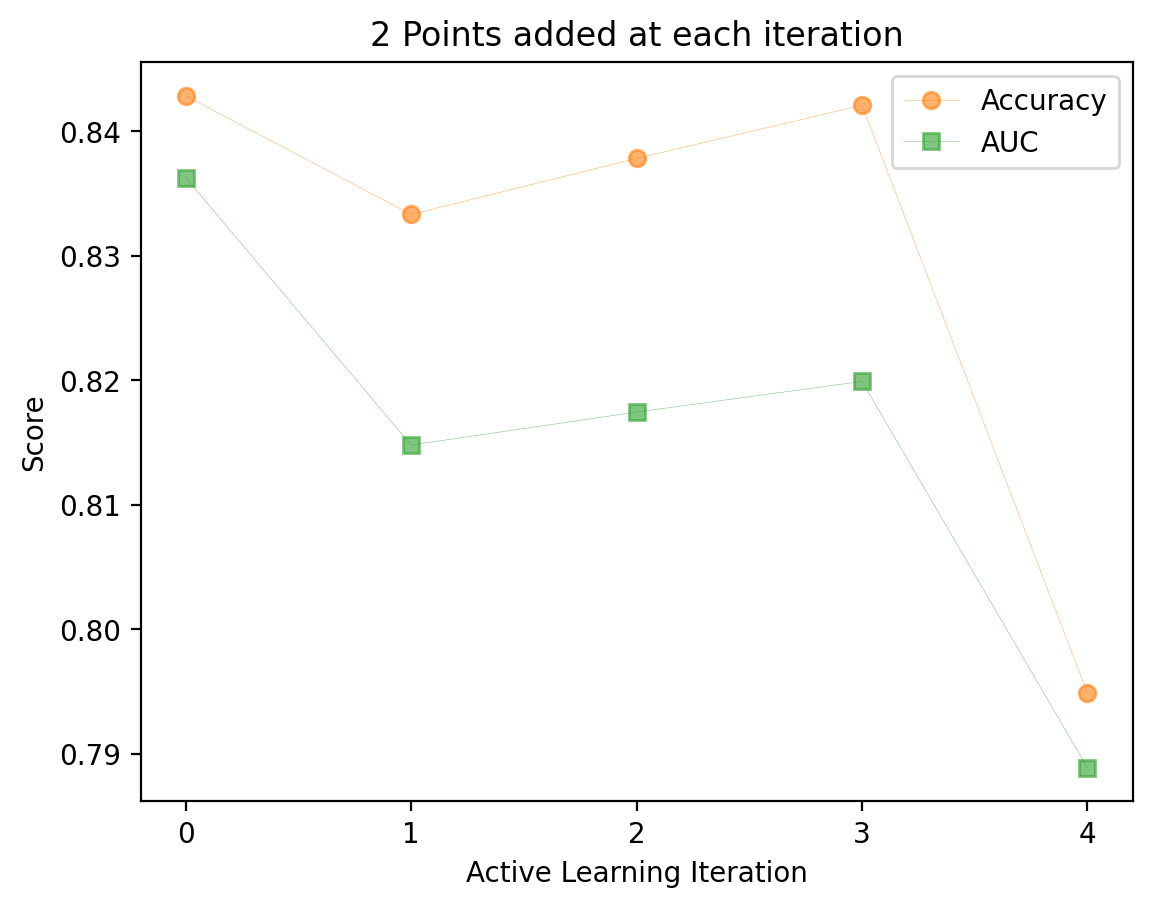

In [69]:
points_to_add = 2

final_predictions, final_uncertainties, accuracy_list, auc_list = active_learning(
    train_data_file='../data/K2CO3-all.csv', 
    new_data_file='../data/0911-FeZnCo-result.csv', 
    kernel_type='Euclidean', 
    gamma=0.1, 
    points_to_add=points_to_add
)

steps = len(accuracy_list)

for i, (accuracy, auc) in enumerate(zip(accuracy_list, auc_list)):
    print(f"Step {i}: Accuracy = {accuracy:.3f}, AUC = {auc:.3f}")

plt.figure(dpi=200)

plt.plot(range(steps), accuracy_list, label="Accuracy", marker='o', color='C1', linewidth=0.2, alpha=0.6)

plt.plot(range(steps), auc_list, label="AUC", marker='s', color='C2', linewidth=0.2, alpha=0.6)
plt.xticks(range(steps))

plt.xlabel('Active Learning Iteration')
plt.ylabel('Score')
plt.title(f'{points_to_add} Points added at each iteration')
plt.legend()

8


Active Learning: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.76it/s]

Step 0: Accuracy = 0.843, AUC = 0.836
Step 1: Accuracy = 0.838, AUC = 0.817
Step 2: Accuracy = 0.795, AUC = 0.789


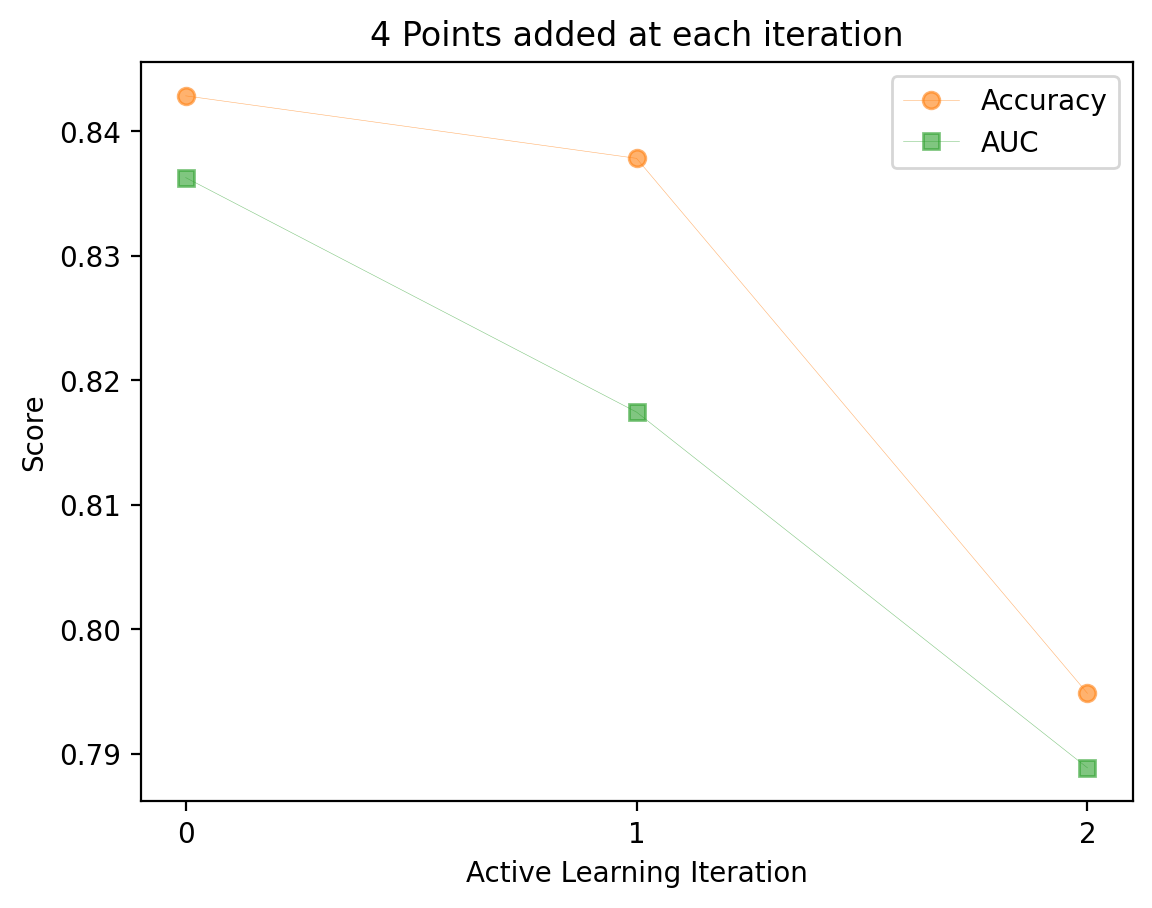

In [70]:
points_to_add = 4

final_predictions, final_uncertainties, accuracy_list, auc_list = active_learning(
    train_data_file='../data/K2CO3-all.csv', 
    new_data_file='../data/0911-FeZnCo-result.csv', 
    kernel_type='Euclidean', 
    gamma=0.1, 
    points_to_add=points_to_add
)

steps = len(accuracy_list)

for i, (accuracy, auc) in enumerate(zip(accuracy_list, auc_list)):
    print(f"Step {i}: Accuracy = {accuracy:.3f}, AUC = {auc:.3f}")

plt.figure(dpi=200)

plt.plot(range(steps), accuracy_list, label="Accuracy", marker='o', color='C1', linewidth=0.2, alpha=0.6)

plt.plot(range(steps), auc_list, label="AUC", marker='s', color='C2', linewidth=0.2, alpha=0.6)
plt.xticks(range(steps))

plt.xlabel('Active Learning Iteration')
plt.ylabel('Score')
plt.title(f'{points_to_add} Points added at each iteration')
plt.legend()

8


Active Learning: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.81it/s]

Step 0: Accuracy = 0.843, AUC = 0.836
Step 1: Accuracy = 0.795, AUC = 0.789


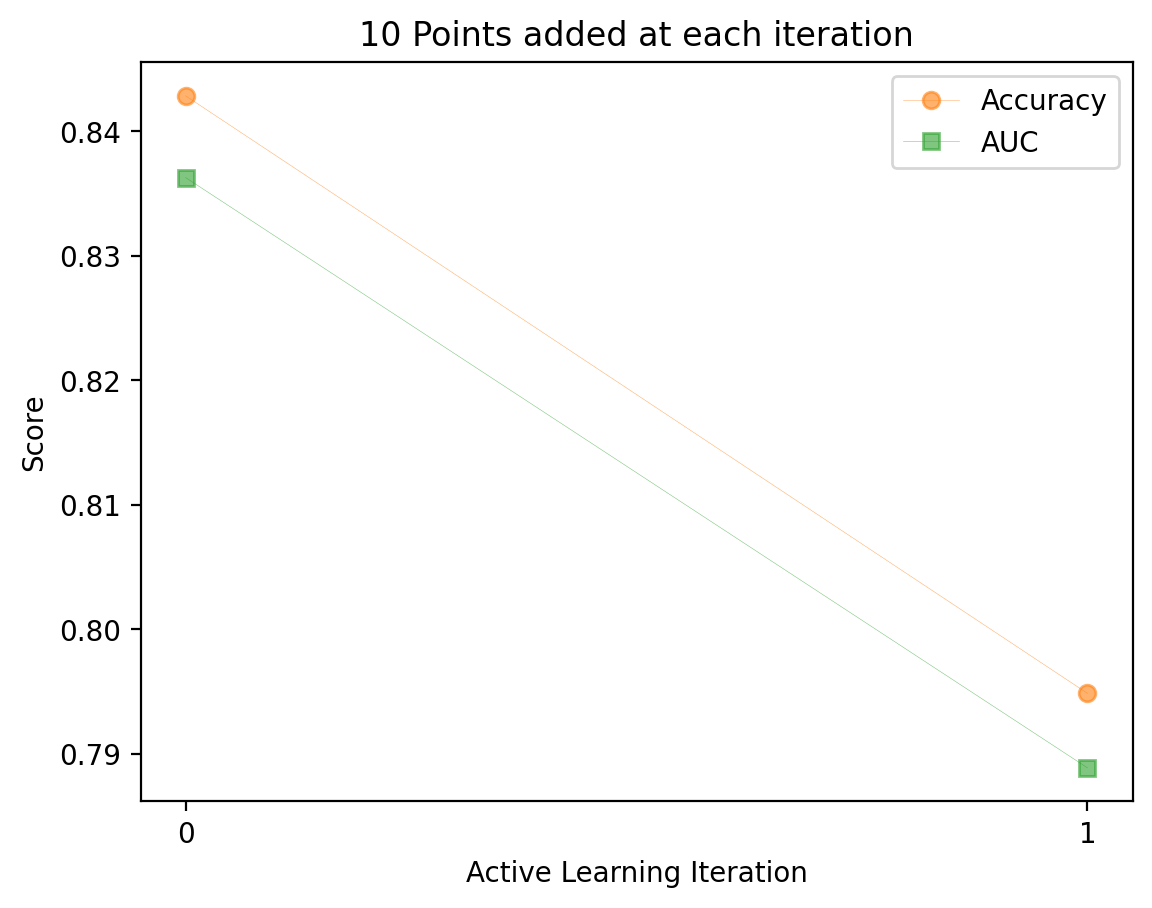

In [68]:
points_to_add = 10

final_predictions, final_uncertainties, accuracy_list, auc_list = active_learning(
    train_data_file='../data/K2CO3-all.csv', 
    new_data_file='../data/0911-FeZnCo-result.csv', 
    kernel_type='Euclidean', 
    gamma=0.1, 
    points_to_add=points_to_add
)

steps = len(accuracy_list)

for i, (accuracy, auc) in enumerate(zip(accuracy_list, auc_list)):
    print(f"Step {i}: Accuracy = {accuracy:.3f}, AUC = {auc:.3f}")

plt.figure(dpi=200)

plt.plot(range(steps), accuracy_list, label="Accuracy", marker='o', color='C1', linewidth=0.2, alpha=0.6)

plt.plot(range(steps), auc_list, label="AUC", marker='s', color='C2', linewidth=0.2, alpha=0.6)
plt.xticks(range(steps))

plt.xlabel('Active Learning Iteration')
plt.ylabel('Score')
plt.title(f'{points_to_add} Points added at each iteration')
plt.legend()

In [43]:
train_data_file='../data/K2CO3-all.csv'
new_data_file = '../data/0911-FeZnCo-result.csv'
kernel_type='Euclidean'
gamma=0.1
random_state=42
verbose = True
points_to_add = 1

# Load and preprocess the initial training data
X_train, y_train, _ = read_and_preprocess_data(train_data_file)
X_train = drop_highly_correlated_columns(_, y_label='singlephase', threshold=0.55)

# Load and preprocess the new data
X_new_all, y_new_all, _ = read_and_preprocess_data(new_data_file)
selected_columns = ['metal_initial_conc', 'metal_mmol', 'K2CO3_initial_conc', 'rate', 'precipitation_order']
X_new_all = X_new_all[selected_columns]

# Arrays to store final predictions and uncertainties
final_predictions = []
final_uncertainties = []

# Iteratively add data points and retrain the model
for i in tqdm(range(0, len(X_new_all), points_to_add), desc="Active Learning"):
    # Get the subset of new data to add
    X_new_subset = X_new_all.iloc[:i+points_to_add].copy()
    y_new_subset = y_new_all.iloc[:i+points_to_add].copy()
    
    # Combine the original training set with the new data subset
    X_combined = pd.concat([X_train, X_new_subset], axis=0).reset_index(drop=True)
    y_combined = pd.concat([y_train, y_new_subset], axis=0).reset_index(drop=True)

    # Train and predict using LOOCV with the updated training set
    predictions, uncertainties = train_and_predict_with_loocv(X_combined, y_combined, 
                                                              kernel_type=kernel_type, 
                                                              gamma=gamma, 
                                                              random_state=random_state)

    # Store the predictions and uncertainties after each incremental step
    final_predictions.append(predictions)
    final_uncertainties.append(uncertainties)

    if verbose:
        print(f"After adding {i+points_to_add} points:")
        print(f"Predictions: {predictions}")
        print(f"Uncertainties: {uncertainties}")
    break

Active Learning:   0%|                                                                                                              | 0/18 [00:00<?, ?it/s]

After adding 1 points:
Predictions: [0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
Uncertainties: [0.84869757 0.24763621 0.45844945 0.54804533 0.20989375 0.67679544
 0.28511364 0.         0.33338885 0.38006664 0.31971708 0.99384447
 0.52600672 0.73272241 0.3333532  0.71835152 0.31971708 0.34915632
 0.49949038 0.17863274 0.7796295  0.13165791 0.33318422 0.31398313
 0.33341463 0.3331009  0.14269649 0.3333532  0.23306782 0.45363225
 0.4852416  0.33341463 0.22282036 0.3839722  0.31971708 0.64235234
 0.7796295  0.33344442 0.3333532  0.34731621 0.73272241 0.53485637
 0.26240171 0.3333524  0.35612237 0.79843747 0.33341463 0.33305704
 0.49949038 0.35758468 0.64571727 0.40400067 0.13897052 0.83726507
 0.60437743 0.61113899 0.57462225 0.67679544 0.48741368 0.09778255
 0.64971474 0.37506554 0.72625443 0.46384594 0.72625443 0.3002

In [42]:
X_train

,metal_initial_conc,metal_mmol,K2CO3_initial_conc,rate,precipitation_order
0,1.00,0.50,0.450000,1,1
1,1.48,1.01,0.340000,6,0
2,1.00,0.50,0.150000,1,1
3,3.00,1.50,0.450000,1,1
4,2.57,1.00,0.160000,3,0
...,...,...,...,...,...
65,0.30,0.90,0.450000,1,1
66,1.09,1.80,0.360000,6,0
67,0.30,0.45,0.450000,1,0
68,2.50,1.00,0.279938,2,1


In [40]:
X_train

,metal_initial_conc,metal_mmol,K2CO3_initial_conc,rate,precipitation_order
0,1.00,0.50,0.450000,1,1
1,1.48,1.01,0.340000,6,0
2,1.00,0.50,0.150000,1,1
3,3.00,1.50,0.450000,1,1
4,2.57,1.00,0.160000,3,0
...,...,...,...,...,...
65,0.30,0.90,0.450000,1,1
66,1.09,1.80,0.360000,6,0
67,0.30,0.45,0.450000,1,0
68,2.50,1.00,0.279938,2,1


In [24]:
new_data_file = '../data/0911-FeZnCo-result.csv'
X_new_all, y_new_all, _ = read_and_preprocess_data(new_data_file)

In [28]:
y_new_all

0     0.0
1     0.0
2     0.0
3     1.0
4     0.0
5     0.0
6     1.0
7     0.0
8     0.0
9     0.0
10    1.0
11    0.0
12    0.0
13    0.0
14    0.0
15    1.0
16    0.0
17    0.0
Name: singlephase, dtype: float32

In [26]:
X

,metal_initial_conc,metal_mmol,K2CO3_initial_conc,rate,precipitation_order
0,1.800000,0.750000,0.110000,4,1
1,1.000000,0.500000,0.150000,6,1
2,0.600000,1.000000,0.430000,2,0
3,1.090000,1.000000,0.360000,6,0
4,0.224299,1.000374,0.307167,2,1
...,...,...,...,...,...
65,1.040000,1.000000,0.300000,6,0
66,2.500000,1.000000,0.280000,2,1
67,0.600000,1.800000,0.430000,2,0
68,3.000000,1.500000,0.150000,6,1


In [27]:
y

0     0.0
1     0.0
2     0.0
3     1.0
4     0.0
     ... 
65    1.0
66    0.0
67    0.0
68    0.0
69    0.0
Name: singlephase, Length: 70, dtype: float32